In [19]:
import torch
import torchvision
import torchvision.transforms as T
import numpy as np
import cv2
from PIL import Image
from matplotlib import pyplot as plt

In [4]:
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /Users/varun/.cache/torch/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


FasterRCNN(
  (transform): GeneralizedRCNNTransform()
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d()
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d()
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d()
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d()
          (relu): ReLU(inplace=True)
          (downsample): Sequential(
            (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): FrozenBatchNorm2d()
          )
  

In [5]:
labels = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [15]:
def get_prediction(image, threshold):

      transform = T.Compose([T.ToTensor()]) 
    
      img = transform(image) 
        
      pred = model([img])

      pred_class = [labels[i] for i in list(pred[0]['labels'].numpy())] 

      bb = [[(i[0], i[1]), (i[2], i[3])] for i in list(pred[0]['boxes'].detach().numpy())] 
     
      prob = list(pred[0]['scores'].detach().numpy())

      prob_t = [prob.index(x) for x in prob if x > threshold][-1]

      bb = bb[:prob_t+1]

      pred_class = pred_class[:prob_t+1]

      return bb, pred_class


In [16]:
image = Image.open('seg1.png')

get_prediction(image,0.5)

([[(419.68646, 170.0683), (536.0842, 493.74524)],
  [(159.0727, 180.36058), (298.8194, 434.4604)],
  [(439.78357, 222.62083), (452.01376, 271.83594)]],
 ['person', 'person', 'tie'])

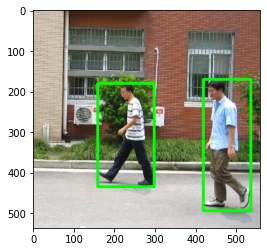

In [24]:
img = cv2.imread('seg1.png') 
boxes, pred_cls = get_prediction(image,0.5)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

for i in range(len(boxes)):
    if(pred_cls[i]=='person'):
        cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=6) 
plt.imshow(img)

In [30]:
def detect_person(image_path,threshold):
    
    image = Image.open(image_path)
    boxes, pred_cls = get_prediction(image,0.5)
    img = cv2.imread(image_path) 
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) 

    for i in range(len(boxes)):
        if(pred_cls[i]=='person'):
            cv2.rectangle(img, boxes[i][0], boxes[i][1],color=(0, 255, 0), thickness=6) 
    
    return img

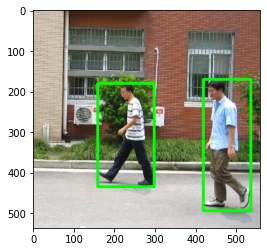

In [28]:
imag = detect_person('seg1.png',0.5)
plt.imshow(imag)

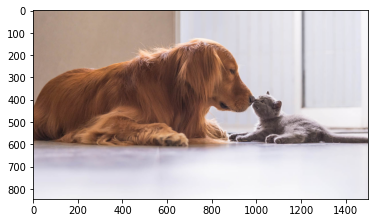

In [31]:
imag = detect_person('seg2.jpg',0.5)
plt.imshow(imag)

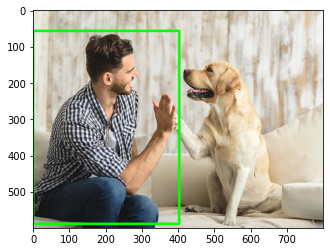

In [32]:
imag = detect_person('seg3.jpg',0.5)
plt.imshow(imag)

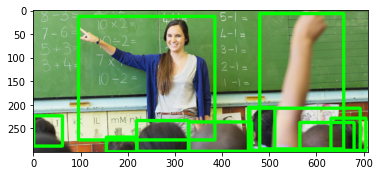

In [33]:
imag = detect_person('seg4.jpg',0.5)
plt.imshow(imag)

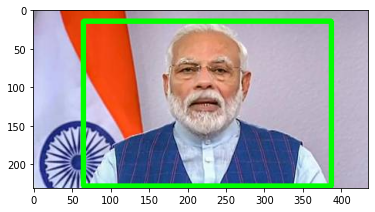

In [35]:
imag = detect_person('seg5.jpeg',0.5)
plt.imshow(imag)